In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('categorical (4).csv')
df

,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,L3,3,Agent,Four-Door Car,Medsize
1,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,L3,1,Agent,Two-Door Car,Medsize
2,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,L2,1,Call Center,SUV,Medsize
3,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,L1,1,Agent,Four-Door Car,Medsize
4,Oregon,Yes,Basic,Bachelor,2011-01-25,Employed,F,Rural,Married,Personal Auto,L3,2,Web,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8187,California,No,Premium,College,2011-01-06,Employed,F,Suburban,Single,Personal Auto,L2,1,Branch,Four-Door Car,Large
8188,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,L1,2,Web,Four-Door Car,Medsize
8189,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,L3,1,Branch,Four-Door Car,Medsize
8190,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,L2,1,Branch,Four-Door Car,Medsize


In [ ]:

Plot time variable. Can you extract something from it?
The time variable can be useful. You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful.

# Plot all the categorical variables with the proper plot. What can you see?


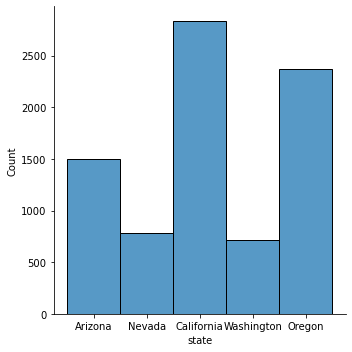

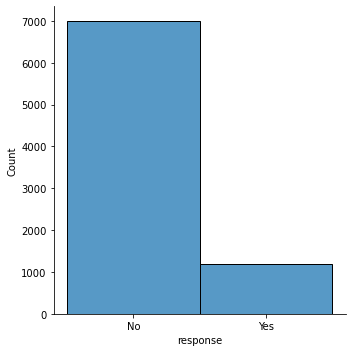

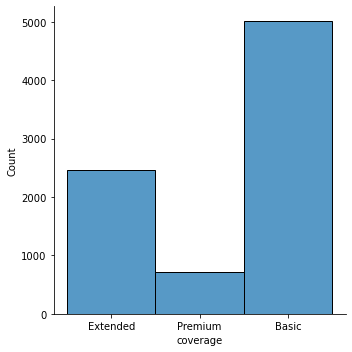

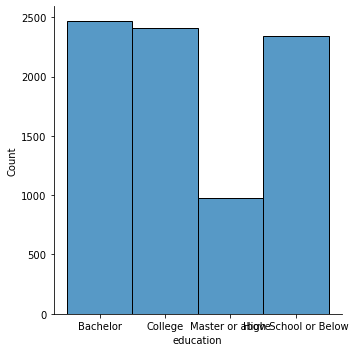

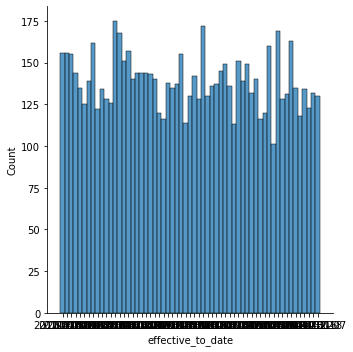

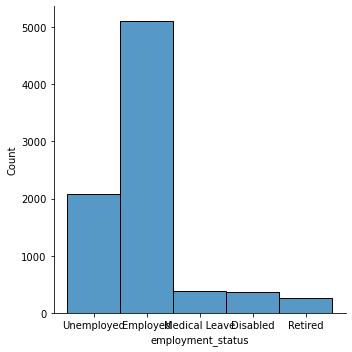

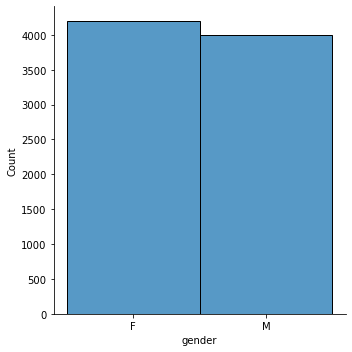

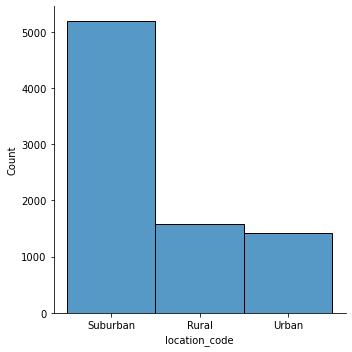

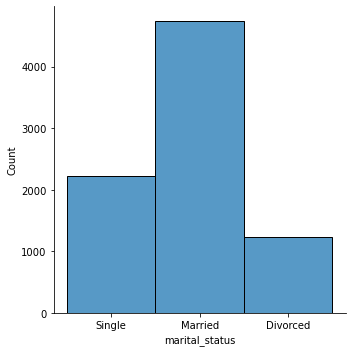

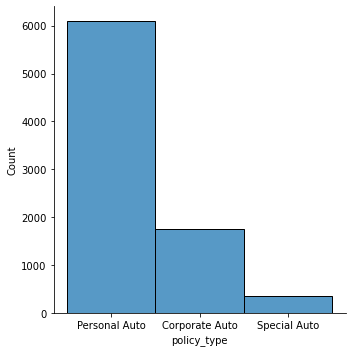

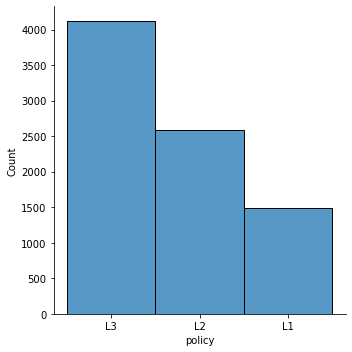

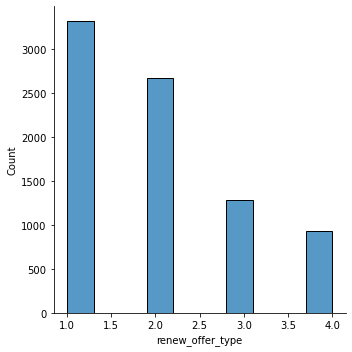

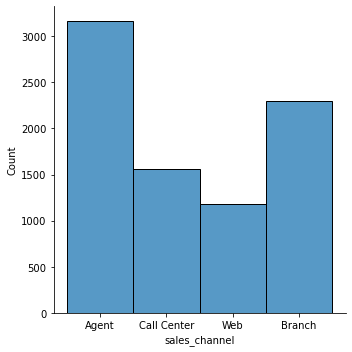

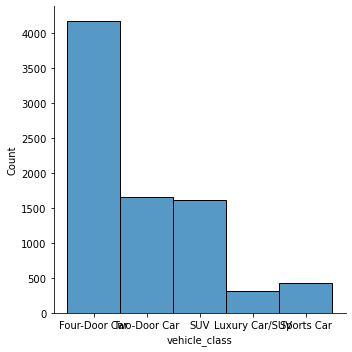

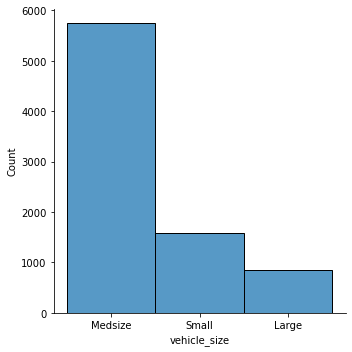

In [3]:
for column in df:     
    sns.displot(df[column], bins=10)
plt.show()

# There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
# Make any changes you feel are necessary.

In [4]:
# State and location code
data_crosstab = pd.crosstab(df['state'], df['location_code'], margins = False)
data_crosstab

location_code,Rural,Suburban,Urban
state,,,
Arizona,288,951,258
California,534,1794,507
Nevada,158,493,128
Oregon,460,1497,412
Washington,138,459,115


In [6]:
import scipy.stats as st

st.chi2_contingency(data_crosstab)[1]
# State and location are independent

0.9693163326484684

In [7]:
# Education and employment status
data_crosstab_2 = pd.crosstab(df['education'], df['employment_status'], margins = False)
data_crosstab_2

employment_status,Disabled,Employed,Medical Leave,Retired,Unemployed
education,,,,,
Bachelor,107,1533,117,85,626
College,91,1483,128,92,613
High School or Below,98,1366,107,65,703
Master or above,64,723,39,19,133


In [8]:
st.chi2_contingency(data_crosstab_2)[1]
# Education and employment status are dependant

3.9621465198014245e-21

In [9]:
# Vehicle class and vehicle size
data_crosstab_3 = pd.crosstab(df["vehicle_class"], df['vehicle_size'], margins = False)
data_crosstab_3

vehicle_size,Large,Medsize,Small
vehicle_class,,,
Four-Door Car,435,2910,830
Luxury Car/SUV,32,209,72
SUV,147,1170,295
Sports Car,46,321,63
Two-Door Car,196,1132,334


In [10]:

st.chi2_contingency(data_crosstab_3)[1]
# Vehicle class and vehicle size are slightly dependant

0.015806906303756224

In [11]:
# Coverage and vehicle class
data_crosstab_4 = pd.crosstab(df["coverage"], df['vehicle_class'], margins = False)
data_crosstab_4

vehicle_class,Four-Door Car,Luxury Car/SUV,SUV,Sports Car,Two-Door Car
coverage,,,,,
Basic,2528,170,1015,270,1030
Extended,1277,104,463,128,493
Premium,370,39,134,32,139


In [12]:
st.chi2_contingency(data_crosstab_4)[1]
# Coverage and vehicle class are independant

0.11768938680611729

In [13]:
# Coverage and vehicle size
data_crosstab_5 = pd.crosstab(df["coverage"], df['vehicle_size'], margins = False)
data_crosstab_5


vehicle_size,Large,Medsize,Small
coverage,,,
Basic,516,3510,987
Extended,279,1713,473
Premium,61,519,134


In [15]:

st.chi2_contingency(data_crosstab_5)[1]

# Coverage and vehicle classs are independant

0.23088369859734045

In [16]:
import os as os
from itertools import product
import scipy.stats as ss

df.columns.values.tolist()
cat1 = ('state',
 'response',
 'coverage',
 'education',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'policy',
 'policy_type',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size')
cat2 = ('state',
 'response',
 'coverage',
 'education',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'policy',
 'policy_type',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size')

In [17]:

# mix them into a big list to have them on both sides
cat_combos = list(product(cat1,cat2, repeat = 1))

In [18]:
# Creating an empty variable and picking only the p value from the output of Chi-Square test
result = []
for i in cat_combos:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            df[i[0]], df[i[1]])))[1]))

In [19]:
#create a crosstab similar to corr()
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2','coeff'])
chi_test_output.round(4)

# Using pivot function to convert the above df into a crosstab
chi_test_output = chi_test_output.pivot(index='var1', columns='var2', values='coeff')

#finds values less than the set condition, which is our p_value
test = chi_test_output.lt(0.05)
test

var2,coverage,education,employment_status,gender,location_code,marital_status,policy,policy_type,renew_offer_type,response,sales_channel,state,vehicle_class,vehicle_size
var1,,,,,,,,,,,,,,
coverage,False,False,True,True,True,False,False,False,True,False,False,False,False,False
education,False,False,True,False,True,True,False,False,True,True,False,False,False,False
employment_status,True,True,False,True,True,True,True,False,True,True,True,False,False,True
gender,True,False,True,False,True,True,False,False,True,False,False,False,False,False
location_code,True,True,True,True,False,True,False,False,True,True,False,False,True,True
marital_status,False,True,True,True,True,False,False,False,True,True,False,False,True,False
policy,False,False,True,False,False,False,False,True,False,False,False,False,False,False
policy_type,False,False,False,False,False,False,True,False,False,False,False,True,False,False
renew_offer_type,True,True,True,True,True,True,False,False,False,True,True,False,True,False


# Plot time variable. Can you extract something from it?

In [ ]:
Ploted before, not useful information. From the business perspective it's more usefil to know, what days you sell more (monday, tuesday, etc.) and which months (as all sales are in 2011)